<a href="https://colab.research.google.com/github/devanoabe/PCVK_GANJIL_23-24/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#TUGAS PRAKTIKUM

#Soal 1


1. Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai
Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk
meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image
dengan gamma correction sesuai rumus yang telah diberikan.

mengubah tingkat kecerahan citra
--------------------------------
masukkan nilai kecerahan : 200


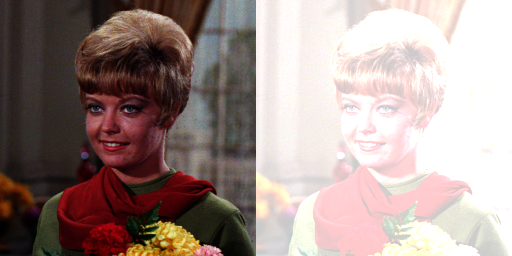

In [11]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
from skimage import transform
from PIL import Image
import matplotlib.pylab as plt
print ('mengubah tingkat kecerahan citra')
print ('--------------------------------')
try:
  brightness = int(input('masukkan nilai kecerahan : '))
except ValueError:
  print('error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK MINGGU 3/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta-brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

#Soal 2

2. Buat Simulasi Image Depth
Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra,
pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada
pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga
255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000
0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika
7bit, maka jumlah warnanya adalah 27 = 128, dst.

 Simulasi Image Depth  
--------------------------
Masukkan nilai Bit Depth: 2


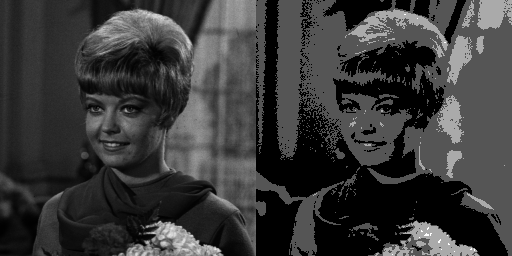

In [12]:
original = cv.imread('/content/drive/MyDrive/PCVK MINGGU 3/Images/female.tiff', cv.IMREAD_GRAYSCALE)
gamma_image = np.zeros(original.shape, original.dtype)

print(' Simulasi Image Depth  ')
print('--------------------------')
try:
  bd = float(input('Masukkan nilai Bit Depth: '))
except ValueError:
  print('Error, not a number')

bit = 2**bd
level = 255 / (bit - 1)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    gamma_image[y, x] = np.clip(round(original[y, x] / level) * level, 0, 255);

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

#Soal 3

3. Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab
sebelumnya.
Citra asli sudah disediakan pada /images/galaxy.jpg.
100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg
Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder ,
gunakan modul glob (import glob).

#Soal 4

4. Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff),
sedangkan image paling kanan

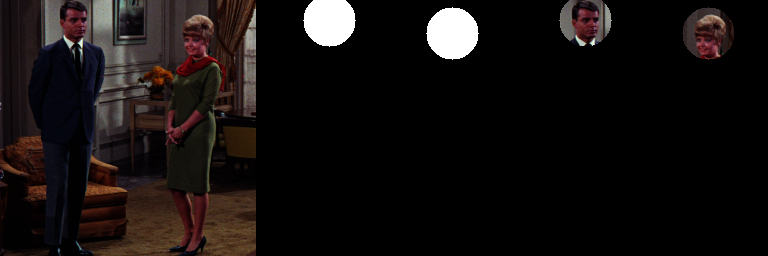

In [24]:
from google.colab.patches import cv2_imshow
image_path = '/content/drive/MyDrive/PCVK MINGGU 3/Images/couple.tiff'
original_image = cv.imread(image_path)

center1 = (73, 20)
radius1 = 26
center2 = (196, 33)
radius2 = 26

mask = np.zeros_like(original_image)
cv.circle(mask, center1, radius1, (255, 255, 255), -1)
cv.circle(mask, center2, radius2, (255, 255, 255), -1)

masked_image = cv.bitwise_and(original_image, mask)

final_frame = cv.hconcat((original_image, mask,masked_image))
cv2_imshow(final_frame)


#Soal 5

5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.
Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.
- OR
- NOT
- NAND
- XOR

#OR

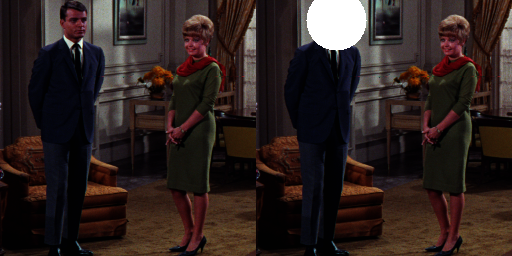

In [29]:
img_org = cv.imread('/content/drive/MyDrive/PCVK MINGGU 3/Images/couple.tiff')

mask = np.zeros(img_org.shape, dtype=np.uint8)
mask = cv.circle(mask, (80,20), 30, (255,255,255), -1)

result = img_org | mask

org_frame = cv.hconcat((img_org, result))
cv2_imshow(org_frame)

#NOT

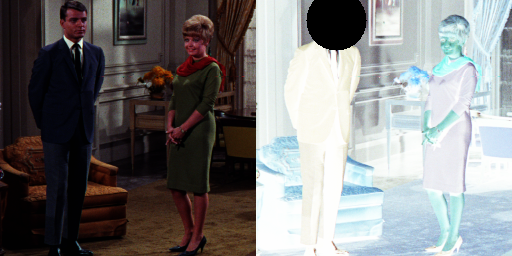

In [30]:
img_org = cv.imread('/content/drive/MyDrive/PCVK MINGGU 3/Images/couple.tiff')

mask = np.zeros(img_org.shape, dtype=np.uint8)
mask = cv.circle(mask, (80,20), 30, (255,255,255), -1)

result = ~img_org & ~mask

org_frame = cv.hconcat((img_org, result))
cv2_imshow(org_frame)

#NAND


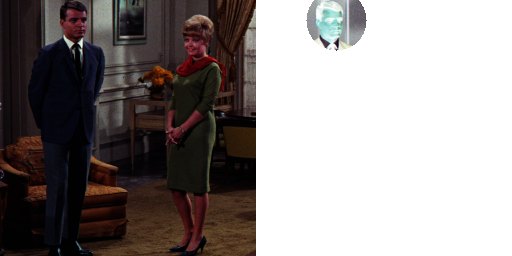

In [32]:
img_org = cv.imread('/content/drive/MyDrive/PCVK MINGGU 3/Images/couple.tiff')

mask = np.zeros(img_org.shape, dtype=np.uint8)
mask = cv.circle(mask, (80,20), 30, (255,255,255), -1)

result = cv.bitwise_not(cv.bitwise_and(img_org, mask))

org_frame = cv.hconcat((img_org, result))
cv2_imshow(org_frame)

#XOR

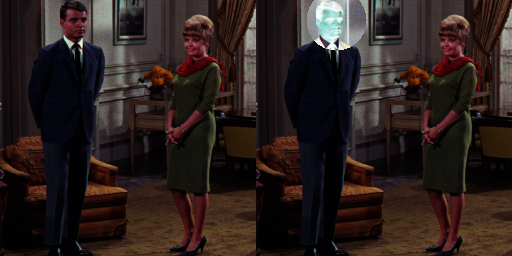

In [34]:
img_org = cv.imread('/content/drive/MyDrive/PCVK MINGGU 3/Images/couple.tiff')

mask = np.zeros(img_org.shape, dtype=np.uint8)
mask = cv.circle(mask, (80,20), 30, (255,255,255), -1)

result = cv.bitwise_xor(img_org, mask)

org_frame = cv.hconcat((img_org, result))
cv2_imshow(org_frame)